#### Prerequisites

We are going to use the Twitter API to get the tweets in real time and to do so, we need to create a developer profile on Twitter.
Go to the management interface of the Twitter application: https://developer.twitter.com/apps. Then, we will just have to click on the blue button "Create an app" and follow the instructions.

In [1]:
# After having obtained the API identifiers, we create a config.ci file where we will store them.

# api_key ='xxxxxxxxxxxxxxx'
# api_key_secret='xxxxxxxxxxx'

# access_token ='xxxxxxxxxxxxxxxxxx'
# access_token_secret='xxxxxxxxxxxxxxxxxxxx'

In [2]:
# Let's import the libraries

import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import configparser
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
config = configparser.ConfigParser()
config.read('config.ini')

['config.ini']

In [4]:
# Twitter API credentials

api_key = config ['twitter']['api_key']
api_key_secret=config['twitter']['api_key_secret']

access_token =config['twitter']['access_token']
access_token_secret=config['twitter']['access_token_secret']

In [5]:
# Create the authentication object
auth =tweepy.OAuthHandler(api_key, api_key_secret)

# Set the acces token and acces token secret
auth.set_access_token(access_token,access_token_secret)

#Create the API object while passing in the auth information
api=tweepy.API(auth)

In [6]:
# Extract 100 tweets from the twitter user
tweets=api.user_timeline(screen_name="Jul_Julien_",count=100,tweet_mode="extended")

# lets check the number of tweets extracted
print(f"Number of tweets exracted:{len(tweets)}.")

Number of tweets exracted:95.


In [7]:
# Print the last tweets from the account

print("The 5 recent tweets are: \n")
i = 1
for tweet in tweets[0:5]:
    print(str(i) + ') ' + tweet.full_text + "\n")
    i+=1

The 5 recent tweets are: 

1) @keepitfame J’avoue 😂

2) RT @digitalmagbf: Un important événement aura lieu demain au Burkina. Il s’agit de l’inauguration de l’usine de montage de téléphones et d’…

3) RT @bce3227: Google offers free learning paths for the following skills:

✅Data Engineer
✅Machine Learning Engineer
✅Cloud Engineer
✅Cloud…

4) RT @tu_babs: Google is offering free learning path for the following skills:

Cloud Engineering Data Path
Data Engineering Learning path
Da…

5) The chance to get a fully customized NLP pipeline built by the incredible spaCy team? Too good to be true?

But it's real!

https://t.co/E5nOORqdeq

#Spacy #datascience #NLP #Python #machineLearning #deeplearning #data



In [8]:
#Create a dataframe

df = pd.DataFrame([tweet.full_text for tweet in tweets], columns = ['Tweets'])
df

,Tweets
0,@keepitfame J’avoue 😂
1,RT @digitalmagbf: Un important événement aura ...
2,RT @bce3227: Google offers free learning paths...
3,RT @tu_babs: Google is offering free learning ...
4,The chance to get a fully customized NLP pipel...
...,...
90,RT @BarackObama: Kobe was a legend on the cour...
91,J'ai très mal😔😔....A quand cela va finir??? Qu...
92,RT @Pontifex_fr: Remercions le Seigneur pour t...
93,RT @ZoulfaouDank: Mon équipe🇧🇫 composé de 5 ad...


Clean the text.

In [9]:
# Create a function to clean the tweets

def CleanTxt(text):
    text = re.sub(r'@[\w]+','',text)
    text = re.sub(r'#','',text)
    text = re.sub(r'RT[\s]+','',text) # \s for space and + for one or more
    text = re.sub(r'https?:\/\/\S+', '', text)
    
    return text

In [10]:
# Cleaning the tweets

df['Tweets'] = df['Tweets'].apply(CleanTxt)
df

,Tweets
0,J’avoue 😂
1,: Un important événement aura lieu demain au B...
2,: Google offers free learning paths for the fo...
3,: Google is offering free learning path for th...
4,The chance to get a fully customized NLP pipel...
...,...
90,: Kobe was a legend on the court and just gett...
91,J'ai très mal😔😔....A quand cela va finir??? Qu...
92,: Remercions le Seigneur pour tout le bien acc...
93,: Mon équipe🇧🇫 composé de 5 adolescents partic...


TextBlob is a python library  for text processing. It provides a simple API to dive in to NLP tasks such as sentiment analysis, translation, parts of speech tagging etc read more on https://textblob.readthedocs.io/en/dev/ it gives us a blob = textBlob(text) and we can extract tags, noun-phrases, sentences by utilizing methods blob.tags, blob.noun-phrases, blob.sentences will create two functions to extract subjectivity and polarity of the tweets using the textblbo library.

In [11]:
# Create a function to get the subjectivity

def getSubjectivity(text):                                 # the subjectivity tells how subjective or opinionated the text is.
    return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity                    # the polarity tells how positive or negative the text is.

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [12]:
#Create two new columns

df['Şubjectivity'] = df['Tweets'].apply(getSubjectivity)     

df[ 'Polarity'] = df['Tweets'].apply(getPolarity) 

#Show the new dataframe with the new columns
df

,Tweets,Şubjectivity,Polarity
0,J’avoue 😂,0.000000,0.000000
1,: Un important événement aura lieu demain au B...,1.000000,0.400000
2,: Google offers free learning paths for the fo...,0.300000,0.166667
3,: Google is offering free learning path for th...,0.450000,0.200000
4,The chance to get a fully customized NLP pipel...,0.612500,0.550000
...,...,...,...
90,: Kobe was a legend on the court and just gett...,0.250000,0.250000
91,J'ai très mal😔😔....A quand cela va finir??? Qu...,0.000000,0.000000
92,: Remercions le Seigneur pour tout le bien acc...,0.000000,0.000000
93,: Mon équipe🇧🇫 composé de 5 adolescents partic...,0.166667,0.125000


Now I want to see how well these sentiments are distributed and a good way to accomplish this task is understanding the common words by plotting a word cloud.

A word cloud is also known as tag clouds or text clouds and it's basically a visualization where the more specific word appears in the text the bigger and bolder it appears in the word cloud. 
So let's visualize all the words and the data using the word cloud plot.

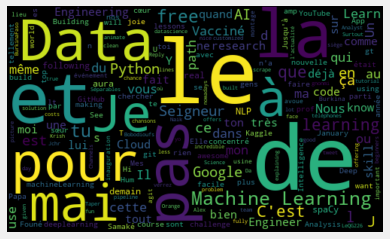

In [13]:
# Plot The Word Cloud

allWords = ' '.join( [twts for twts in df['Tweets']] )
wordCloud = WordCloud(width = 500, height=300, random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis ('off')
plt.show()

In [14]:
# Create a function to compute the negative, neutral and positive analysis

def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else: 
        return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)       


#Show the dataframe
df 

,Tweets,Şubjectivity,Polarity,Analysis
0,J’avoue 😂,0.000000,0.000000,Neutral
1,: Un important événement aura lieu demain au B...,1.000000,0.400000,Positive
2,: Google offers free learning paths for the fo...,0.300000,0.166667,Positive
3,: Google is offering free learning path for th...,0.450000,0.200000,Positive
4,The chance to get a fully customized NLP pipel...,0.612500,0.550000,Positive
...,...,...,...,...
90,: Kobe was a legend on the court and just gett...,0.250000,0.250000,Positive
91,J'ai très mal😔😔....A quand cela va finir??? Qu...,0.000000,0.000000,Neutral
92,: Remercions le Seigneur pour tout le bien acc...,0.000000,0.000000,Neutral
93,: Mon équipe🇧🇫 composé de 5 adolescents partic...,0.166667,0.125000,Positive


#### Print all of the positive tweets.

In [15]:
j=1
sortedDF = df.sort_values (by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
    if (sortedDF['Analysis'][i] == 'Positive'):
        print(str(j) + ') '+sortedDF['Tweets'][i])
        print()
        j = j+1

1) : Un important événement aura lieu demain au Burkina. Il s’agit de l’inauguration de l’usine de montage de téléphones et d’…

2) : Google offers free learning paths for the following skills:

✅Data Engineer
✅Machine Learning Engineer
✅Cloud Engineer
✅Cloud…

3) : Google is offering free learning path for the following skills:

Cloud Engineering Data Path
Data Engineering Learning path
Da…

4) The chance to get a fully customized NLP pipeline built by the incredible spaCy team? Too good to be true?

But it's real!



Spacy datascience NLP Python machineLearning deeplearning data

5) A lot of beginners don't know how to use git and GitHub.

Here's an awesome tutorial by  explaining it for you:                                                               



git github

6) : It costs $0.00 to learn machine learning nowadays.

You can:

• Use Kaggle to scrape your data
• Use Kaggle to clean yo…

7) Have a nice day  

8) : Here's a fun challenge for you.

Reply to this tweet with a solu

#### Print all of the negative tweets.

In [16]:
j=1
sortedDF = df.sort_values (by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
    if (sortedDF['Analysis'][i] == 'Negative'):
        print(str(j) + ') '+sortedDF['Tweets'][i])
        print()
        j = j+1

1) : Did you know you can animate a picture of yourself with a few lines of Python code using 🐍✨ 

Here's all the code…

2)  La volonté de reprendre tes cours, c'est déjà bien parti...le tps passe tellement vite qu'un jour tu dira: &lt;&lt;ça n'a pas été facile, mais jai réussi&gt;&gt; Beaucoup de courage à toi et que le Seigneur vous assiste (ton bb et toi) tout au long de votre parcours...

3) : Five FREE Udemy courses for learning Artificial Intelligence 💯🤖

Thread 🧵👇



#### Plot the polarity and subjectivity.

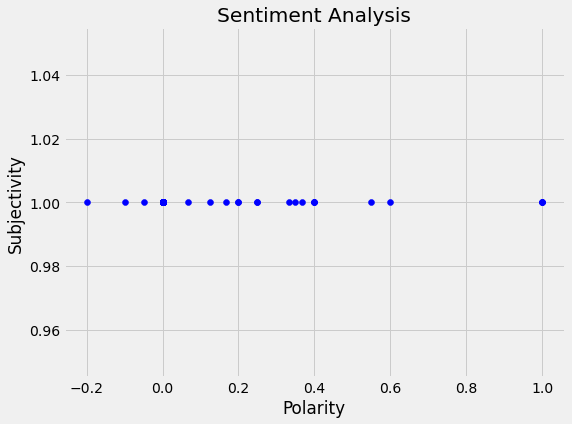

In [17]:
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Şubjectivity'][1], color='Blue' )

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [18]:
# Get the percentage of positive tweets

postweets = df[df.Analysis == 'Positive']
postweets = postweets['Tweets']
           
print(round((postweets.shape[0] / df. shape[0]) *100,1), "%")

18.9 %


In [19]:
# Get the percentage of negative tweets

negtweets = df[df.Analysis == 'Negative']
negtweets = negtweets['Tweets']
           
print(round((negtweets.shape[0] / df. shape[0]) *100,1), "%")

3.2 %


In [20]:
# Get the percentage of negative tweets

negtweets = df[df.Analysis == 'Neutral']
negtweets = negtweets['Tweets']
           
print(round((negtweets.shape[0] / df. shape[0]) *100,1), "%")

77.9 %


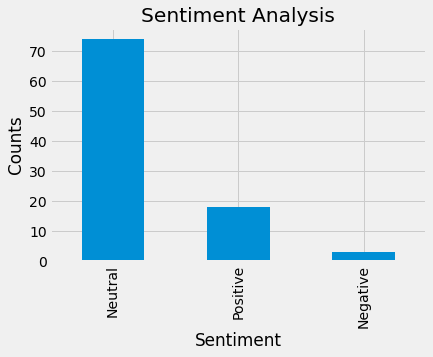

In [21]:
#Show the value counts

df['Analysis'].value_counts()
#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts ().plot(kind='bar')
plt.show()